
# chapmter 10 - Predicting Continuous Target Variables 
with Regression Analysis

회귀분석에 따른 연속적 목표변수 예측

## 1 simple linear regression model
심플(단변량)은 단일 feature (x) 와 연속형 반응값 (목표변수 y)관계를 모델링 한다

$y = W_0 + W_1x$

#### 수직 offset, 잔차 residuals :  회귀선에서 샘플 관측치까지의 수직선
#### 심플 선형회귀 (Simple linear regression) : 한개의 설명변수를 갖는 회귀식
#### 이는 추후 '다중 선형회귀'로 발전가능하다

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/simple_regression.png" align='left' width='400'>

## 2 하우징 데이터 탐색
Housing Dataset

In [1]:
# Attributes:
# 1. CRIM      자치시별 1인당 범죄율
# 2. ZN        25,000 평방피트를 초과하는 '거주지역'의 비율
# 3. INDUS     '비소매 상업지역'의 토지비율
# 4. CHAS      1 : 강의 경계에 위치, 0: 강의 경계가 아님
# 5. NOX       10ppm 당 '일산화질소'의 농도
# 6. RM        1개 주택의 평균 방의 수
# 7. AGE       1940년 이전건설된 주택비율
# 8. DIS       5개 Boston 직업센터와 접근성
# 9. RAD       방사형 고속도로까지 접근성 지표
# 10. TAX      $10,000 당 재산세율
# 11. PTRATIO  자치시별 학생/교사 비율
# 12. B        자치시별 흑인비율 : 1000(Bk - 0.63)^2 
# 13. LSTAT    하위계층의 비율
# 14. MEDV     본인소유 주택의 가격

### 01 Import Data
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [2]:
import pandas as pd

df = pd.read_csv('./data/housing.data', header=None, sep='\s+') # space로 공간을 분할
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 02 데이터의 주요특성 시각화
Visualization

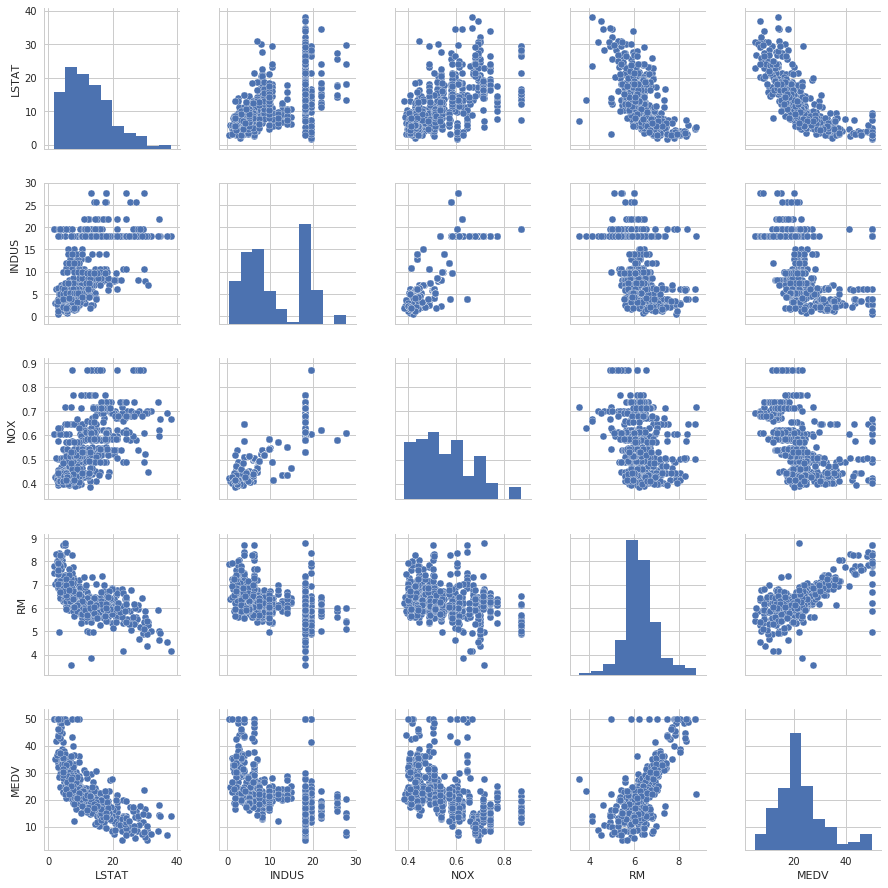

In [4]:
# 데이터의 산점도 행렬을 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout(); plt.show()

In [5]:
# seaborn 을 사용하면 Matplotlib 의 설정이 seaborn에 맞게 변경된다
# Matplotlib의 기본스타일로 되돌리고 싶으면
# sns.reset_orig() # 를 실행해야 한다

In [6]:
# Heat Map 을 사용한 상관성 분석
import numpy as np

cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

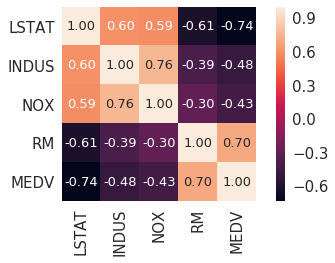

In [7]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 13},
                 yticklabels = cols, xticklabels = cols)
plt.tight_layout()
plt.show()

## 3 순위형 최소제곱 선형회귀 모델의 구현
샘플과 관측치간의 수직거리 제곱을 최소화 하는 모델을 구현

### 01 Gradient Descent 를 갖는 회귀 parametor 모델
ADline 모델의 Gradient Descent를 활용한 비용함수를 구현

In [8]:
# 계단 함수를 제거하고 부드러운 곡선으로 데이터 표준화
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [9]:
# 'RM'을 근거로 'MEDV'를 추정하는 공식을 추출
X = df[['RM']].values # 'RM' 방의 갯수 '설명변수'
y = df['MEDV'].values # 'MEDV' 집 가격 'Target'

In [10]:
# 변수들을 표준화(StandardScaler)
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [11]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

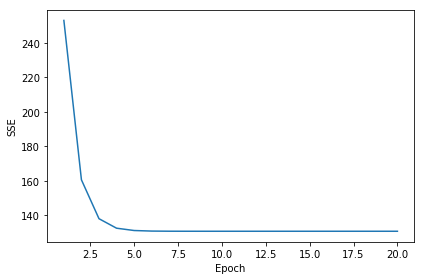

In [12]:
sns.reset_orig() # matplotlib 설정을 초기화 한다

# 선형회귀 epoch 반복시 Cost 변화를 시각화로 확인
# plt.plot(range(1,n) : EPOCH , lr.cost : COST)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel('Epoch');  plt.ylabel('SSE')
plt.tight_layout() ;  plt.show()

In [13]:
# 결론
# lr을 반복할수록 Cost가 감소함을 확인

### 02 회귀식과 산포도를 함께비교
matplotlib

In [14]:
# 선형모델에 fitting 을 시각화
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

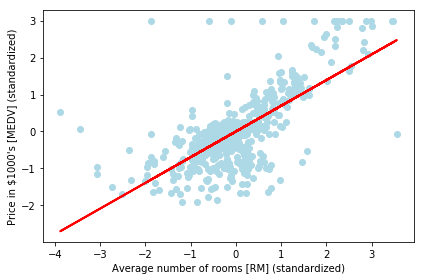

In [15]:
# RM(방 갯수) 에 대한 MEDV(집 가격) 선형곡선 시각화
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout(); plt.show()

In [16]:
# 결론
# 방의 갯수에 따라 집의 가격은 정의 관계를 갖는다
# 하지만 선밖에도 많은 데이터가 분포를 통해, 직접적인 요인은 아님을 알 수 있다

### 03 회귀식을 Test
방 5개인 집 가격을 예측

In [17]:
# 출력단위를 Price $1,000 단위의 축으로 조정한다
# 기울기는 0.695를 갖는 원점을 지나는 회귀식
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [18]:
# 방의 갯수가 5.0개일 떄 집의 가격을 출력
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


## 3 scikit-learn을 활용한 회귀모델 계수 추정
scikit-learn

In [19]:
# scikit-learn을 활용한 회귀식 도출
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)  # Regression 으로 예측한 Y값 (Targe 과는 불일치)
print('Slope: {:.3f} \nIntercept: {:.3f}'.format(slr.coef_[0], slr.intercept_))

Slope: 9.102 
Intercept: -34.671


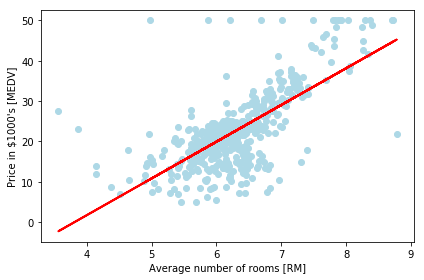

In [21]:
lin_regplot(X, y, slr)   # Regression Plot
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout(); plt.show()

## 3 RANSAC를 사용하는 강건한 회귀모델
RANdom Sample Consensus : 이상치를 버리는 알고리즘

In [ ]:
# 1 '참된정보'의 모델을 fitting 할 임의의 sample 수를 선택한다
# 2 나머지 관측치를 test하며,'참된정보' 허용오차 안의 관측치는 추가한다
# 3 모든 '참된정보'를 사용하여 모델을 fitting 한다
# 4 fitting 모델과, '참된정보'의 오차를 추정한다
# 5 알고리즘 성능이 임계치를 만족하면완료, 아니면 1을 반복한다